In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())

# Handle missing values
data = data.fillna(data.median())

# Separate features and target
X = data.drop(columns=['target'])
y = data['target']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [28]:
# Example of creating interaction features
X['age_sex'] = X['age'] * X['sex']

# Example of creating polynomial features
X['age_squared'] = X['age'] ** 2
X['sex_squared'] = X['sex'] ** 2

# Example of extracting date-time components (if applicable)
# X['date'] = pd.to_datetime(X['date'])
# X['year'] = X['date'].dt.year
# X['month'] = X['date'].dt.month
# X['day'] = X['date'].dt.day

# Update scaled features after new feature engineering
X_scaled = scaler.fit_transform(X)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [31]:
# Example of creating interaction feature between age and sex
X['age_sex_interaction'] = X['age'] * X['sex']

# Example of creating polynomial features for age and sex
X['age_squared'] = X['age'] ** 2
X['sex_squared'] = X['sex'] ** 2

# Update scaled features after new feature engineering
X_scaled = scaler.fit_transform(X)
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print(pca.explained_variance_ratio_)
print(f'Number of components selected: {pca.n_components_}')
data.tail()


[0.24828072 0.18067129 0.10090745 0.06983458 0.06768033 0.05786748
 0.05596637 0.04831136 0.04448949 0.04185605 0.03169539 0.02866134]
Number of components selected: 12


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


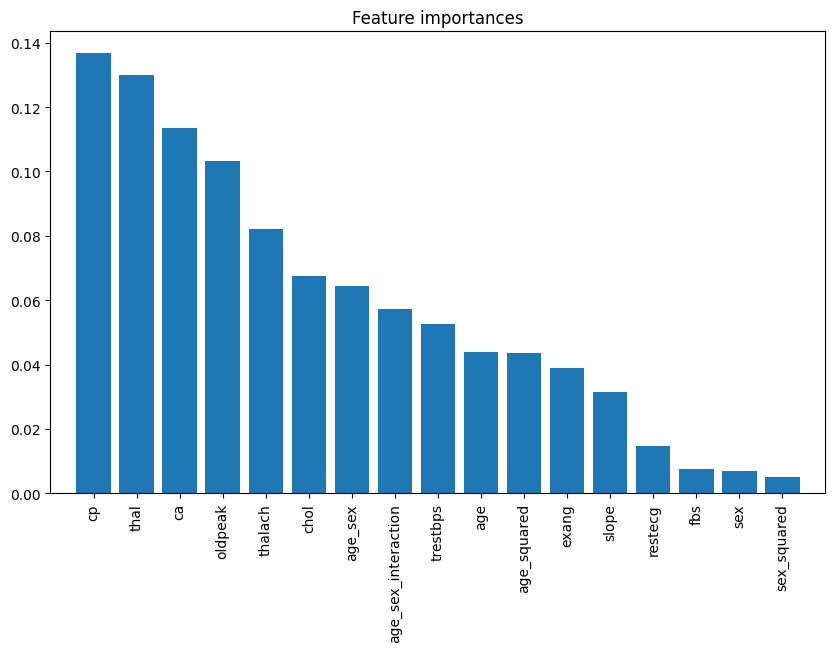

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForest to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Select important features
model = SelectFromModel(rf, prefit=True)
X_important_train = model.transform(X_train)
X_important_test = model.transform(X_test)


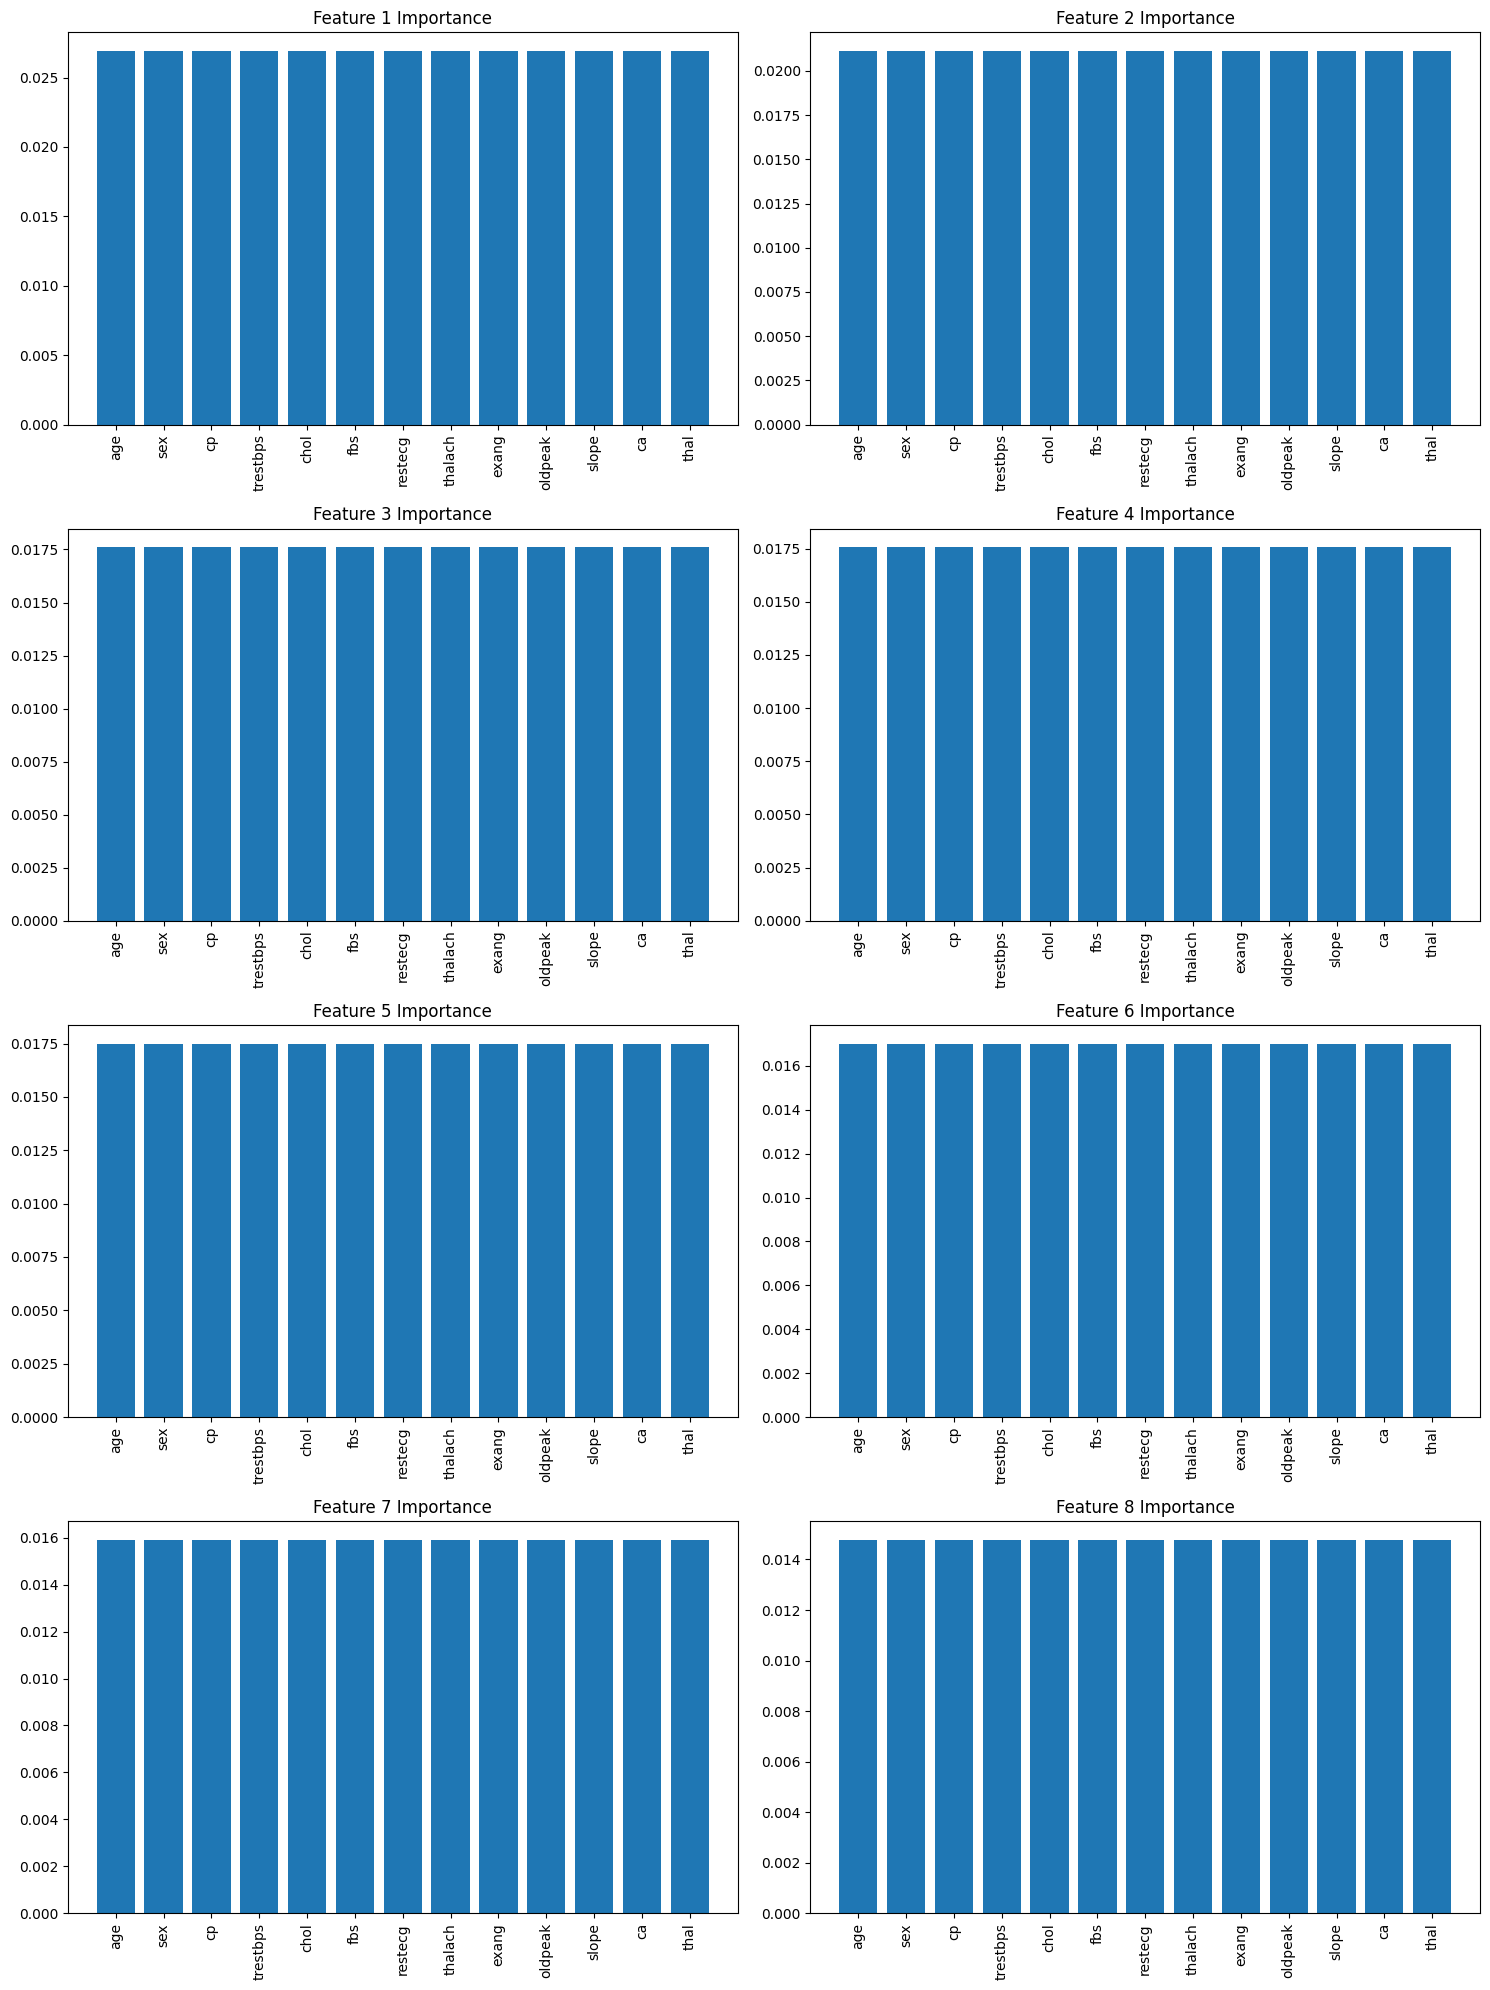

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForest to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Number of features to display
num_features = 9

# Plot feature importances in multiple bar graphs
fig, axs = plt.subplots(num_features // 2, 2, figsize=(15, 20))

for i, ax in enumerate(axs.flatten()):
    if i < len(indices):
        feature_idx = indices[i]
        ax.bar(range(len(X.columns)), importances[feature_idx], align="center")
        ax.set_title(f"Feature {i+1} Importance")
        ax.set_xticks(range(len(X.columns)))
        ax.set_xticklabels(X.columns, rotation=90)
        ax.set_xlim([-1, len(X.columns)])
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# Select important features
model = SelectFromModel(rf, prefit=True)
X_important_train = model.transform(X_train)
X_important_test = model.transform(X_test)


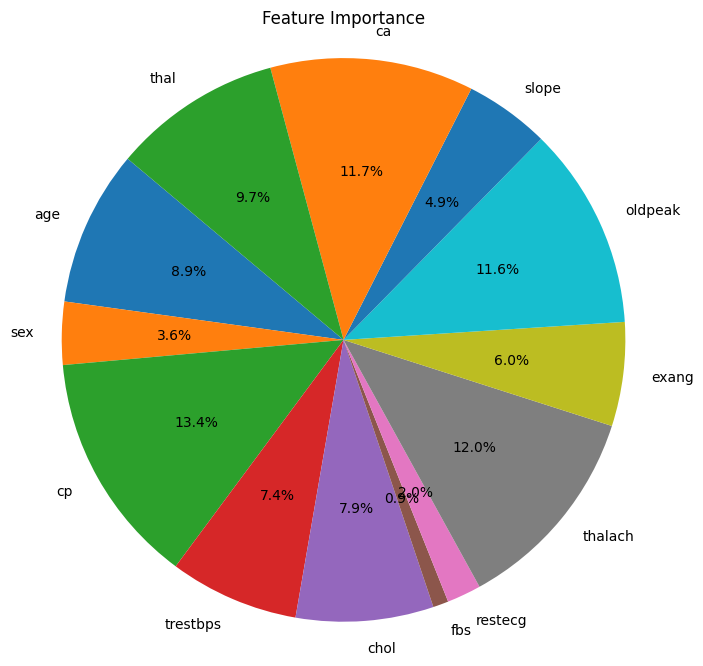

In [9]:
X = data.drop(columns=['target'])
y = data['target']

# Train RandomForestClassifier to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Plot feature importances using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(importances, labels=X.columns, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Feature Importance')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_important_train, y_train)

# Predict on test data
y_pred = clf.predict(X_important_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.775609756097561
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       102
           1       0.75      0.83      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.77       205
weighted avg       0.78      0.78      0.78       205

